## Kaggle: https://www.kaggle.com/datasets/evangower/premier-league-matches-19922022

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.- Carga de la Data y un pequeños vistazo a la misma

In [129]:
data = pd.read_csv('./eplmatches.csv')

data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [130]:
data.shape

(11646, 8)

In [131]:
# Consulta de datos faltantes 

data.isnull().sum()

Season_End_Year    0
Wk                 0
Date               0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11646 entries, 0 to 11645
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  11646 non-null  int64 
 1   Wk               11646 non-null  int64 
 2   Date             11646 non-null  object
 3   Home             11646 non-null  object
 4   HomeGoals        11646 non-null  int64 
 5   AwayGoals        11646 non-null  int64 
 6   Away             11646 non-null  object
 7   FTR              11646 non-null  object
dtypes: int64(4), object(4)
memory usage: 728.0+ KB


In [133]:
# Conversión de los tipos de datos a formatos más eficientes

data['Date'] = pd.to_datetime(data['Date'])

data['FTR'] = data['FTR'].astype('category')

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11646 entries, 0 to 11645
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Season_End_Year  11646 non-null  int64         
 1   Wk               11646 non-null  int64         
 2   Date             11646 non-null  datetime64[ns]
 3   Home             11646 non-null  object        
 4   HomeGoals        11646 non-null  int64         
 5   AwayGoals        11646 non-null  int64         
 6   Away             11646 non-null  object        
 7   FTR              11646 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(4), object(2)
memory usage: 648.5+ KB


## 2.- Creación de nueva data para facilitar la lectura del DF

In [135]:
data['TotalGoals'] = data['HomeGoals'] + data['AwayGoals']

In [136]:
data['WinningTeam'] =  [data['Home'].values[i] if data['FTR'].values[i] == 'H' else  
                        data['Away'].values[i] if data['FTR'].values[i] == 'A' else 
                        np.nan for i in range(len(data))]

data['LosingTeam'] =   [data['Home'].values[i] if data['FTR'].values[i] == 'A' else 
                        data['Away'].values[i] if data['FTR'].values[i] == 'H' else 
                        np.nan for i in range(len(data))] 

# En busca de entender mejor nuestra data creamos las columnas ['WinningTeam'] & ['LosingTeam'] 

In [137]:
data['Result'] = data['HomeGoals'].astype(str) + ' - ' + data['AwayGoals'].astype(str)

# La columna ['Result'] viene de la concatenación de 2 columnas de tipo -int- que fueron previamente llevadas a tipo -str-
# por lo que su uso es primeramente de tipo gráfico por qué no será posible iterar sobre ella


In [138]:
data.sort_values(by = ['Date'], ascending = True, ignore_index = True, inplace = True)

# Nos aseguramos que los partidos estén organizados en base a la fecha

In [139]:
data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,WinningTeam,LosingTeam,Result
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,Coventry City,Middlesbrough,2 - 1
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,3,Leeds United,Wimbledon,2 - 1
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,Sheffield Utd,Manchester Utd,2 - 1
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,6,NaN,NaN,3 - 3
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,6,Norwich City,Arsenal,2 - 4


## 3.- Revisando Totales y promedios

In [140]:
print('El total de temporadas a analizar en este DF es de:', len(data['Season_End_Year'].value_counts()))
print('Y el total de partidos disputados es de:', len(data['Season_End_Year']))

El total de temporadas a analizar en este DF es de: 30
Y el total de partidos disputados es de: 11646


In [141]:
data['Season_End_Year'].value_counts().sort_index().head(10)

# Las primeras 3 temporadas se disputaron entre 22 equipos mientras que las siguientes se estableció que los equipos a 
# Disputar la premier sería de 20, por eso la aparición de esos registros atípicos.
# Se disputaban 42 jornadas de 11 partidos cada una

1993    462
1994    462
1995    462
1996    380
1997    380
1998    380
1999    380
2000    380
2001    380
2002    380
Name: Season_End_Year, dtype: int64

In [142]:
data['Home'].nunique()
# len(data['Home'].unique()) -- Otra forma de conseguir el mismo resultado

# Usando el método (- .nunique() -) podemos determinar que hasta la fecha 50 equipos diferentes han disputado al menos 1
# temporada en la english Premier League

50

In [143]:
# De los 11646 acá podemos ver con exactitud la distribución de victorias y empates

data['FTR'].value_counts().to_frame().style.background_gradient(cmap = 'winter')

,FTR
H,5335
A,3301
D,3010


In [144]:
# con la función (- round() -) podemos ver que hay una tendencia clara a que sea el equipo local el que gane los partidos

round(data['FTR'].value_counts (normalize = True) * 100,2)

H    45.81
A    28.34
D    25.85
Name: FTR, dtype: float64

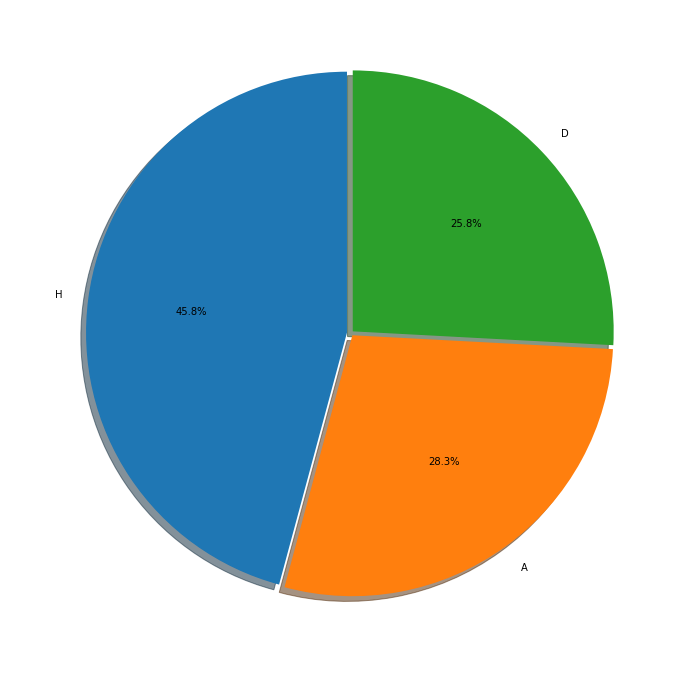

In [145]:
fig, ax = plt.subplots(figsize =(22,12))
data['FTR'].value_counts().plot.pie(autopct = '%1.1f%%', explode =[0.015,0.01,0.01], startangle = 90, shadow = True)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

In [146]:
print('El Total de goles anotados en la historia es:',data['TotalGoals'].sum())
print('Obteniendo un promedio de goles anotados por partido de:',round(data['TotalGoals'].mean() * 1,2))
print('Los equipos en condición de Local han anotado:',data['HomeGoals'].sum())
print('Por su parte los equipos visitantes han anotado:',data['AwayGoals'].sum())

El Total de goles anotados en la historia es: 30988
Obteniendo un promedio de goles anotados por partido de: 2.66
Los equipos en condición de Local han anotado: 17711
Por su parte los equipos visitantes han anotado: 13277


In [147]:
# El promedio de goles anotados en los partidos ganados por el equipo local

round(data.loc[data['FTR'] == 'H', ['TotalGoals']].mean() * 1,2)

TotalGoals    2.96
dtype: float64

In [148]:
# El promedio de goles anotados en los partidos ganados por el equipo visitante

round(data.loc[data['FTR'] == 'A', ['TotalGoals']].mean() * 1,2)

TotalGoals    2.84
dtype: float64

In [149]:
# El promedio de goles anotados en los partidos que finalizan empatados

round(data.loc[data['FTR'] == 'D', ['TotalGoals']].mean() * 1,2)

TotalGoals    1.94
dtype: float64

In [150]:
# En el total de combinaciones de goles encontramos 12 combinaciones posibles

data['TotalGoals'].nunique()

12

In [151]:
# Desglosándolo podemos ver que tenemos resultados con alta cantidad de goles, aunque el mismo es un dato atípico
# la mayor parte de los resultados se concentra entre los 2 y 4 goles por partido, lo que va de la mano con los promedios

data['TotalGoals'].value_counts().to_frame().style.background_gradient(cmap = 'winter')

,TotalGoals
2,2820
3,2481
1,2095
4,1737
0,955
5,885
6,406
7,170
8,69
9,22


In [152]:
# Podemos detectar la presencia de registros atípicos

data.loc[(data['TotalGoals'] >= 10), :]

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,WinningTeam,LosingTeam,Result
6015,2008,8,2007-09-29,Portsmouth,7,4,Reading,H,11,Portsmouth,Reading,7 - 4
6141,2008,20,2007-12-29,Tottenham,6,4,Reading,H,10,Tottenham,Reading,6 - 4
6831,2010,13,2009-11-22,Tottenham,9,1,Wigan Athletic,H,10,Tottenham,Wigan Athletic,9 - 1
7492,2012,3,2011-08-28,Manchester Utd,8,2,Arsenal,H,10,Manchester Utd,Arsenal,8 - 2
8037,2013,20,2012-12-29,Arsenal,7,3,Newcastle Utd,H,10,Arsenal,Newcastle Utd,7 - 3
8216,2013,38,2013-05-19,West Brom,5,5,Manchester Utd,D,10,NaN,NaN,5 - 5


## 4.- Cual es el Resultado que más se repiten

In [153]:
data['Result'].value_counts().to_frame().reset_index().\
    rename(columns= {'index' : 'Resultado', 'Result' : 'Conteo'}).head(10)

,Resultado,Conteo
0,1 - 1,1348
1,1 - 0,1231
2,2 - 1,1012
3,2 - 0,957
4,0 - 0,955
5,0 - 1,864
6,1 - 2,731
7,2 - 2,568
8,3 - 1,517
9,0 - 2,515


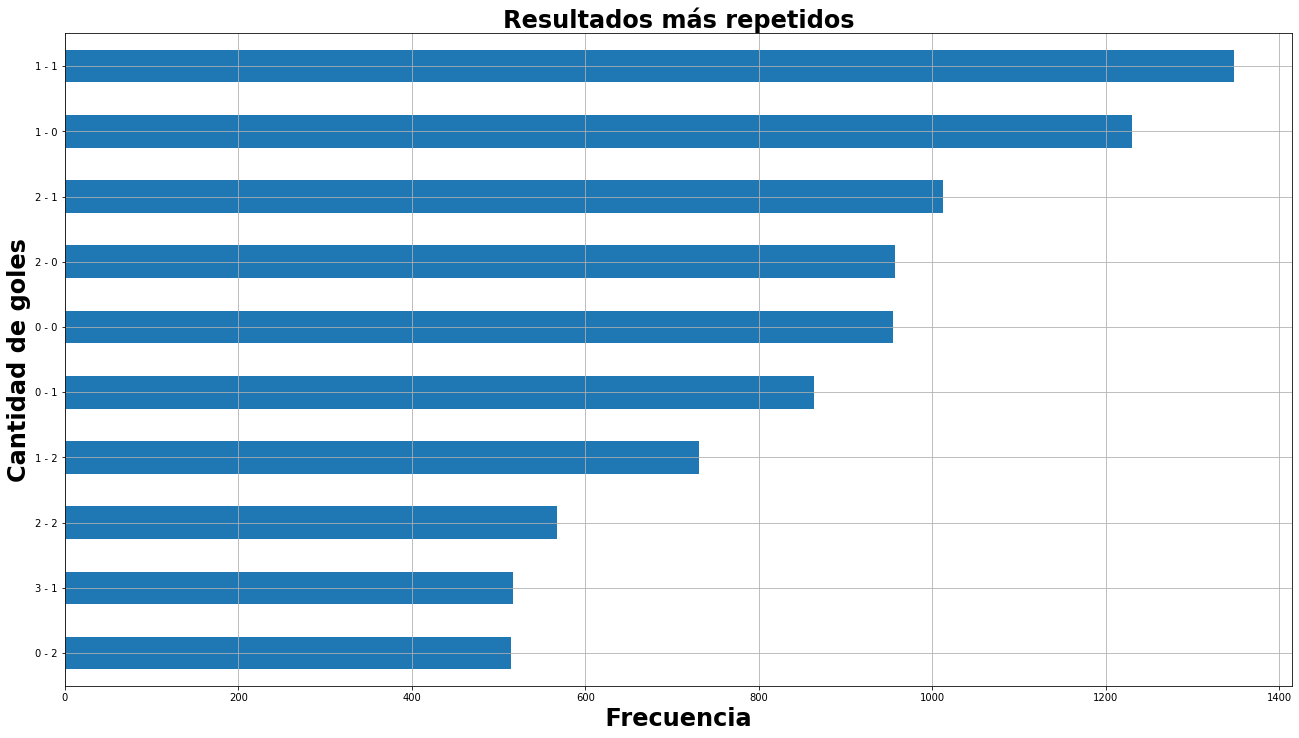

In [154]:
plt.rcParams['figure.figsize'] = [22, 12]

data['Result'].value_counts().head(10).sort_values().plot.barh()
plt.title('Resultados más repetidos', fontsize = 24, fontweight = 'bold')
plt.xlabel(' Frecuencia ' , fontsize = 24, fontweight = 'bold')
plt.ylabel('Cantidad de goles', fontsize = 24, fontweight = 'bold')
plt.grid()
plt.show()

## 5 .- Goles Anotados vs Recibidos

In [155]:
# Goles Anotados

HomeGoalCount = data.groupby(['Home'])['HomeGoals'].sum().reset_index()
HomeGoalCount.columns = ['index','Home Goals']

AwayGoalCount = data.groupby(['Away'])['AwayGoals'].sum().reset_index()
AwayGoalCount.columns = ['index','Away Goals']

TotalGoalScored = pd.merge(HomeGoalCount, AwayGoalCount, how ='right', on ='index')
TotalGoalScored.sort_values(by=['Home Goals','Away Goals'], ascending = False).head(10)

,index,Home Goals,Away Goals
27,Manchester Utd,1214,971
25,Liverpool,1156,865
0,Arsenal,1154,863
14,Chelsea,1121,852
43,Tottenham,995,750
26,Manchester City,957,701
18,Everton,881,610
29,Newcastle Utd,831,546
46,West Ham,730,505
1,Aston Villa,684,581


In [156]:
TotalGoalScored['Total'] = TotalGoalScored['Home Goals'] + TotalGoalScored['Away Goals']
TotalGoalScored['Diferencial'] = TotalGoalScored['Home Goals'] - TotalGoalScored['Away Goals']
TotalGoalScored.sort_values(by = ['Total'], ascending = False).head(10)

,index,Home Goals,Away Goals,Total,Diferencial
27,Manchester Utd,1214,971,2185,243
25,Liverpool,1156,865,2021,291
0,Arsenal,1154,863,2017,291
14,Chelsea,1121,852,1973,269
43,Tottenham,995,750,1745,245
26,Manchester City,957,701,1658,256
18,Everton,881,610,1491,271
29,Newcastle Utd,831,546,1377,285
1,Aston Villa,684,581,1265,103
46,West Ham,730,505,1235,225


In [157]:
Top10Goals = TotalGoalScored.sort_values(by=['Total'], ascending = False).head(10)
Top10Goals = Top10Goals.drop('Total', axis = 1)

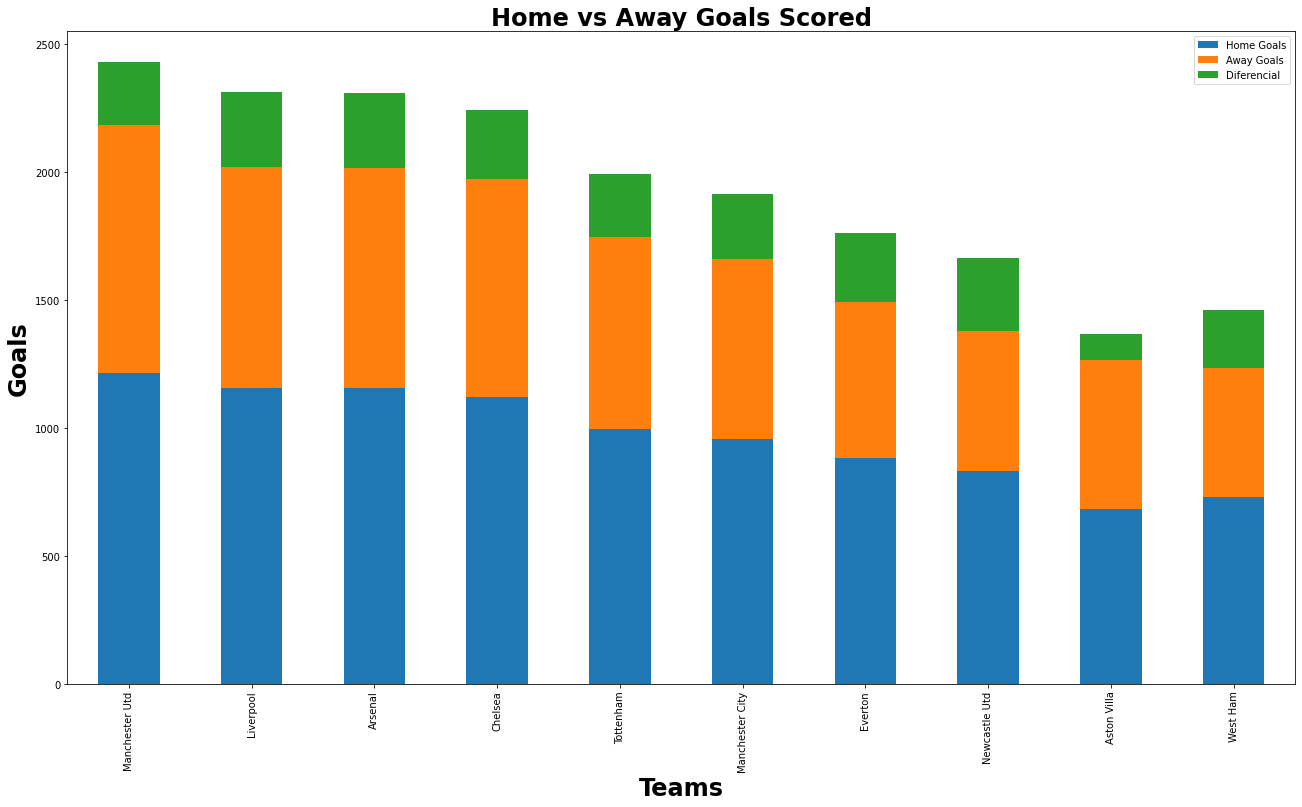

In [158]:
Top10Goals.plot(x='index', kind='bar', stacked=True)

plt.title('Home vs Away Goals Scored', fontsize = 24, fontweight = 'bold')
plt.xlabel('Teams', fontsize = 24, fontweight = 'bold')
plt.ylabel('Goals', fontsize = 24, fontweight = 'bold')
plt.show()

In [159]:
# Goles Concedidos 

HomeGoalConceded = data.groupby(['Home'])['AwayGoals'].sum().to_frame().reset_index().rename({'Home' : 'index'}, axis = 1)

AwayGoalConceded = data.groupby(['Away'])['HomeGoals'].sum().to_frame().reset_index().rename({'Away' : 'index'}, axis = 1)

TotalGoalConceded = pd.merge(AwayGoalConceded, HomeGoalConceded, how = 'right', on = 'index' )
TotalGoalConceded.sort_values(by = ['HomeGoals', 'AwayGoals'], ascending = False).head(10)

,index,HomeGoals,AwayGoals
18,Everton,841,640
29,Newcastle Utd,826,591
43,Tottenham,820,618
46,West Ham,794,635
1,Aston Villa,776,577
38,Southampton,740,542
25,Liverpool,689,458
0,Arsenal,659,489
14,Chelsea,640,485
27,Manchester Utd,638,428


In [160]:
TotalGoalConceded['Total'] = TotalGoalConceded['HomeGoals'] + TotalGoalConceded['AwayGoals']
TotalGoalConceded['Diferencial'] = TotalGoalConceded['HomeGoals'] - TotalGoalConceded['AwayGoals']
TotalGoalConceded.sort_values(by = ['Total'], ascending = False).head(10)

,index,HomeGoals,AwayGoals,Total,Diferencial
18,Everton,841,640,1481,201
43,Tottenham,820,618,1438,202
46,West Ham,794,635,1429,159
29,Newcastle Utd,826,591,1417,235
1,Aston Villa,776,577,1353,199
38,Southampton,740,542,1282,198
0,Arsenal,659,489,1148,170
25,Liverpool,689,458,1147,231
14,Chelsea,640,485,1125,155
26,Manchester City,610,458,1068,152


In [161]:
Top10GoalsConced = TotalGoalConceded.sort_values(by=['Total'], ascending = False).head(10)
Top10GoalsConced = Top10GoalsConced.drop('Total', axis = 1)

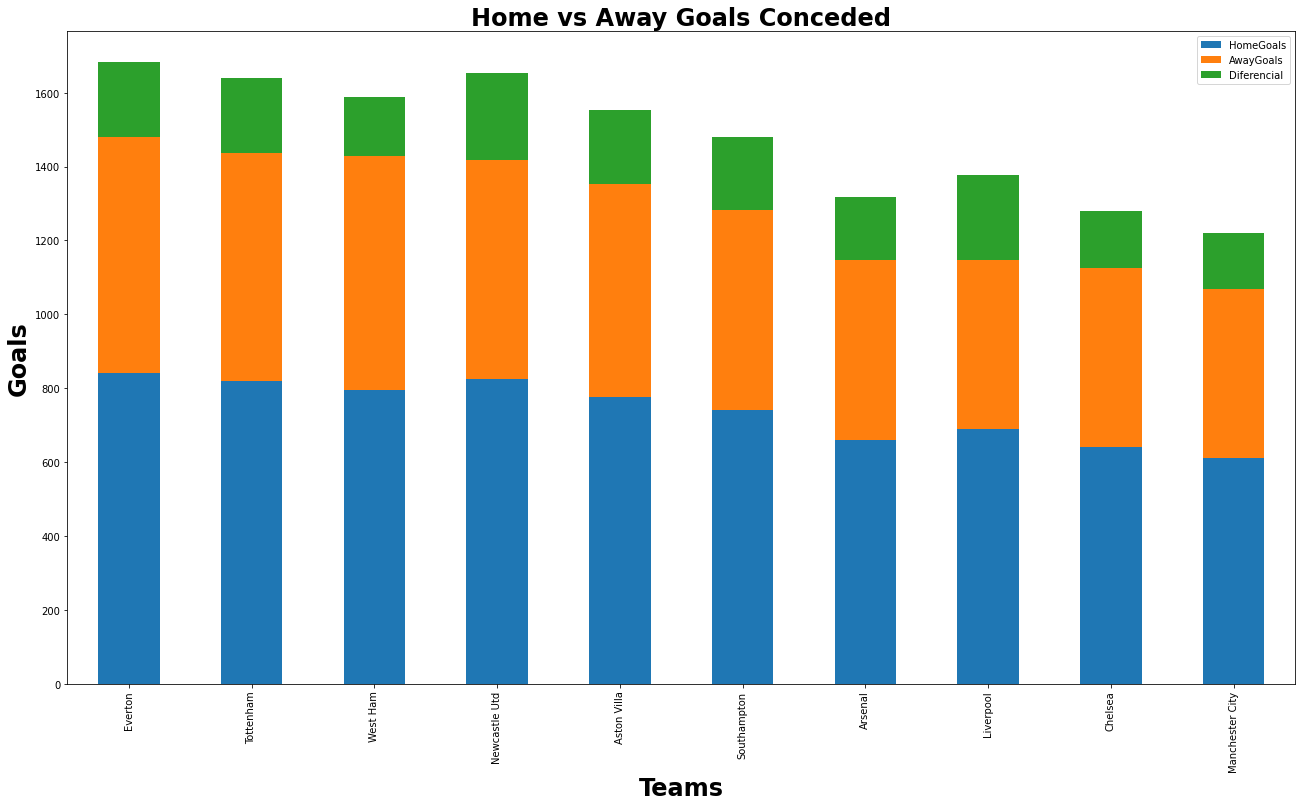

In [162]:
Top10GoalsConced.plot(x='index', kind='bar', stacked=True)

plt.title('Home vs Away Goals Conceded', fontsize = 24, fontweight = 'bold')
plt.xlabel('Teams', fontsize = 24, fontweight = 'bold')
plt.ylabel('Goals', fontsize = 24, fontweight = 'bold')
plt.show()

In [163]:
TotalGoals = pd.merge(TotalGoalScored, TotalGoalConceded, how = 'right', on = 'index')

TotalGoals.rename({'Home Goals':'HGScored', 'Away Goals':'AGScored', 'Total_x':'TGScored', 'Diferencial_x': 'DGScored',
'HomeGoals':'HGConceded','AwayGoals':'AGConceded','Total_y':'TGConceded','Diferencial_y':'DGConceded'}, axis = 1, inplace = True)

In [164]:
TotalGoals.head()

,index,HGScored,AGScored,TGScored,DGScored,HGConceded,AGConceded,TGConceded,DGConceded
0,Arsenal,1154,863,2017,291,659,489,1148,170
1,Aston Villa,684,581,1265,103,776,577,1353,199
2,Barnsley,25,12,37,13,47,35,82,12
3,Birmingham City,162,111,273,51,220,140,360,80
4,Blackburn,545,382,927,163,526,381,907,145


In [165]:
HomeGoalRate = data.groupby('Home').mean()['HomeGoals'].reset_index().rename(columns={'Home':'Teams'})

In [166]:
AwayGoalRate = data.groupby('Away').mean()['AwayGoals'].reset_index().rename(columns={'Away':'Teams'})

In [167]:
# Promedio de goles anotados por los equipos en condición de local vs visitante

AvgGoal = HomeGoalRate.merge(AwayGoalRate, how ='right', on='Teams').sort_values(by=['HomeGoals'],
                                ascending = False, ignore_index=True) 
AvgGoal.head(10)

,Teams,HomeGoals,AwayGoals
0,Manchester Utd,2.107639,1.685764
1,Liverpool,2.006944,1.501736
2,Arsenal,2.003472,1.498264
3,Manchester City,1.989605,1.457380
4,Chelsea,1.946181,1.479167
5,Tottenham,1.727431,1.302083
6,Newcastle Utd,1.607350,1.056093
7,Oldham Athletic,1.595238,0.904762
8,Blackpool,1.578947,1.315789
9,Blackburn,1.566092,1.097701


In [168]:
# Cual es el promedio de goles anotados en los partidos que son ganados por el Liverpool

round(data.loc[data['WinningTeam'] == 'Liverpool', 'TotalGoals'].mean()*1,2)

3.18

In [169]:
# Cual es el promedio de goles anotados en los partidos que el Liverpool pierde

round(data.loc[data['LosingTeam'] == 'Liverpool', 'TotalGoals'].mean()*1,2)

2.6

In [170]:
# Cual es el promedio de goles anotados en los partidos de visitante por el Liverpool 

round(data.loc[data['Away'] == 'Liverpool', 'TotalGoals'].mean()*1,2)

2.7

In [171]:
# Cual es el promedio de goles anotados en los partidos de Local por el Liverpool 

round(data.loc[data['Home'] == 'Liverpool', 'TotalGoals'].mean()*1,2)

2.8

In [172]:
HistoricHomeGoals = data.pivot_table('HomeGoals','Season_End_Year',aggfunc=sum).\
                    sort_values('HomeGoals', ascending =False).reset_index()

In [173]:
HistoricAwayGoals = data.pivot_table('AwayGoals','Season_End_Year',aggfunc=sum).\
                    sort_values('AwayGoals', ascending =False).reset_index()

In [174]:
HistoricGoals = pd.merge(HistoricHomeGoals, HistoricAwayGoals, how = 'right', on = 'Season_End_Year')

In [175]:
HistoricGoals['Total'] = HistoricGoals['HomeGoals'] + HistoricGoals['AwayGoals'] 

In [176]:
HistoricGoals['Dif'] = HistoricGoals['HomeGoals'] - HistoricGoals['AwayGoals']

In [177]:
# Total histórico de goles anotados por temporada
# Podemos notar que las temporadas 93, 94, 95, son las que encabezan el conteo, pero no debemos olvidar que estas temporadas
# se realizaron con 22 equipos por lo que por temporada se disputaban 462 partidos a diferencia del resto con 380

HistoricGoals.sort_values(by = 'Total', ascending = False).head(10)

,Season_End_Year,HomeGoals,AwayGoals,Total,Dif
2,1993,723,499,1222,224
0,1994,663,532,1195,131
3,1995,697,498,1195,199
5,2019,596,476,1072,120
4,2022,575,496,1071,79
7,2012,604,462,1066,142
10,2017,607,457,1064,150
6,2013,592,471,1063,121
12,2011,617,446,1063,171
18,2000,635,425,1060,210


## 6.- Partidos ganados y perdidos

In [178]:
HomeWins = data.loc[data['FTR'] == 'H', 'WinningTeam'].value_counts().to_frame().\
    reset_index().rename(columns= {'WinningTeam' : 'HomeWin'})

In [179]:
AwayWins = data.loc[data['FTR'] == 'A', 'WinningTeam'].value_counts().to_frame().\
    reset_index().rename(columns= {'WinningTeam' : 'AwayWin'})

In [180]:
HomeLosses = data.loc[data['FTR'] == 'H', 'LosingTeam'].value_counts().to_frame().\
    reset_index().rename(columns= {'LosingTeam' : 'HomeLose'})

In [181]:
AwayLosses = data.loc[data['FTR'] == 'A', 'LosingTeam'].value_counts().to_frame().\
    reset_index().rename(columns= {'LosingTeam' : 'AwayLose'})

In [182]:
TotalWins = pd.merge(HomeWins, AwayWins,how ='right',on ='index')

In [183]:
TotalLosses = pd.merge(HomeLosses, AwayLosses,how ='right',on ='index')

In [184]:
WinsLosses = pd.merge(TotalWins, TotalLosses,how ='right',on ='index')

In [185]:
WinsLosses['TotalWins'] = WinsLosses['HomeWin'] + WinsLosses['AwayWin']
WinsLosses['TotalLoses'] = WinsLosses['HomeLose'] + WinsLosses['AwayLose']
WinsLosses['DifWinsLoses'] = WinsLosses['TotalWins'] - WinsLosses['TotalLoses']

In [186]:
# Total histórico de victorias y derrotas de cada uno de los equipos 
# tanto en condición de local como de visitante, y el diferencial entre ambas

# El Manchester United es el equipo con mayor cantidad de victorias (703), menor cantidad de derrotas (192)
# por lo que ostenta el mejor diferencial entre victorias y derrotas con (511)

WinsLosses.sort_values(by = 'TotalWins', ascending = False).head(10)

,index,HomeWin,AwayWin,HomeLose,AwayLose,TotalWins,TotalLoses,DifWinsLoses
21,Manchester Utd,402,301,128,64,703,192,511
16,Arsenal,368,251,172,77,619,249,370
15,Chelsea,354,264,171,79,618,250,368
17,Liverpool,363,246,185,76,609,261,348
5,Tottenham,311,191,236,133,502,369,133
9,Manchester City,280,193,175,104,473,279,194
2,Everton,267,151,259,155,418,414,4
4,Newcastle Utd,253,129,252,136,382,388,-6
0,Aston Villa,208,146,228,160,354,388,-34
1,West Ham,216,119,250,158,335,408,-73


In [187]:
# Acá podemos constatar que uno de los equipos históricos de la Premier League (Everton ha disputados las 30 temporadas)
# es también el equipo con la mayor cantidad de derrotas (414), así como, la de la mayor cantidad de derrotas en casa (259)

WinsLosses.sort_values(by = 'HomeLose', ascending = False).head()

,index,HomeWin,AwayWin,HomeLose,AwayLose,TotalWins,TotalLoses,DifWinsLoses
2,Everton,267,151,259,155,418,414,4
4,Newcastle Utd,253,129,252,136,382,388,-6
1,West Ham,216,119,250,158,335,408,-73
5,Tottenham,311,191,236,133,502,369,133
3,Southampton,178,96,230,141,274,371,-97


In [188]:
# Podemos ver que al equipo que en más oportunidades ha derrotado el Manchester United en la historia de la Premier League 
# es nada más y nada menos que al Tottenham, otro de los equipos históricos de la competición que ha disputado todas y 
# cada una de las 30 temporadas, seguido muy de cerca por el Everton y el Aston Villa

data.loc[data['WinningTeam'] == 'Manchester Utd', 'LosingTeam'].value_counts().to_frame().\
reset_index().rename({'index':'Teams', 'LosingTeam':'Wins'}, axis = 1).head(10)

,Teams,Wins
0,Tottenham,38
1,Everton,37
2,Aston Villa,37
3,Newcastle Utd,32
4,West Ham,32
5,Southampton,28
6,Liverpool,28
7,Arsenal,25
8,Manchester City,24
9,Sunderland,23


In [189]:
# De la misma forma los equipos que más derrotas le han propinado al Manchester United son Liverpool y Chelsea (otros de
# los históricos de la competición) con 18 cada uno, seguidos muy de cerca por Arsenal y Manchester City (17).
# A pesar de no haber disputado todas las temporadas el partido que enfrenta a los equipos de la ciudad de Manchester 
# siempre se vive con mucha pasión, de ahí que el City ostente este registro


data.loc[data['LosingTeam'] == 'Manchester Utd', 'WinningTeam'].value_counts().to_frame().\
reset_index().rename({'index':'Teams', 'WinningTeam':'Losses'}, axis = 1).head(10)

,Teams,Losses
0,Liverpool,18
1,Chelsea,18
2,Arsenal,17
3,Manchester City,17
4,Tottenham,10
5,Everton,10
6,Southampton,7
7,Newcastle Utd,7
8,West Ham,7
9,Blackburn,6


## 7.- Temporadas y partidos disputados por equipo

In [190]:
# Acá podemos conocer cuantas temporadas ha disputado cada equipo en la historia de la Premier League

SeasonPlayed = data.groupby(['Home'])['Season_End_Year'].nunique()

SeasonPlayed = SeasonPlayed.sort_values(ascending= False).reset_index().\
                rename({'Home':'index','Season_End_Year':'Seasons'}, axis = 1)

SeasonPlayed.head(10)

,index,Seasons
0,Arsenal,30
1,Chelsea,30
2,Tottenham,30
3,Manchester Utd,30
4,Everton,30
5,Liverpool,30
6,Newcastle Utd,27
7,Aston Villa,27
8,West Ham,26
9,Manchester City,25


In [191]:
# por el formato en que se disputa la competición se sobre entiende que un equipo disputa la misma cantidad de partidos en
# condición de local como de visitante, por lo que la suma entre estos es el resultado de los partidos totales disputados

Matches = data['Home'].value_counts().to_frame().reset_index().rename(columns = {'Home' : 'Matches'})

Matches['Matches'] = (Matches['Matches'] * 2)

Matches.head(10)

,index,Matches
0,Manchester Utd,1152
1,Arsenal,1152
2,Liverpool,1152
3,Everton,1152
4,Chelsea,1152
5,Tottenham,1152
6,Aston Villa,1038
7,Newcastle Utd,1034
8,West Ham,996
9,Manchester City,962


## 8.- Cuadro Final

In [192]:
SeasonPlayed.columns

Index(['index', 'Seasons'], dtype='object')

In [193]:
Matches.columns

Index(['index', 'Matches'], dtype='object')

In [194]:
WinsLosses.columns

Index(['index', 'HomeWin', 'AwayWin', 'HomeLose', 'AwayLose', 'TotalWins',
       'TotalLoses', 'DifWinsLoses'],
      dtype='object')

In [195]:
TotalGoals.columns

Index(['index', 'HGScored', 'AGScored', 'TGScored', 'DGScored', 'HGConceded',
       'AGConceded', 'TGConceded', 'DGConceded'],
      dtype='object')

In [196]:
Total = pd.merge(SeasonPlayed, Matches, how = 'right', on = 'index')

In [197]:
Total = pd.merge(Total, WinsLosses, how = 'right', on = 'index')

In [198]:
Total = pd.merge(Total, TotalGoals, how = 'right', on = 'index')

In [199]:
Total.head(3)

,index,Seasons,Matches,HomeWin,AwayWin,HomeLose,AwayLose,TotalWins,TotalLoses,DifWinsLoses,HGScored,AGScored,TGScored,DGScored,HGConceded,AGConceded,TGConceded,DGConceded
0,Arsenal,30,1152,368,251,172,77,619,249,370,1154,863,2017,291,659,489,1148,170
1,Aston Villa,27,1038,208,146,228,160,354,388,-34,684,581,1265,103,776,577,1353,199
2,Barnsley,1,38,7,3,15,8,10,23,-13,25,12,37,13,47,35,82,12


In [200]:
Total['Draws'] = Total['Matches'] - (Total['TotalWins'] + Total['TotalLoses'])

In [201]:
Total['Points'] = (Total['TotalWins'] * 3) + Total['Draws']

In [202]:
Total['Win%'] = round((Total['TotalWins']/ Total['Matches'])*100,2)

In [203]:
Total.head(10)

,index,Seasons,Matches,HomeWin,AwayWin,HomeLose,AwayLose,TotalWins,TotalLoses,DifWinsLoses,...,AGScored,TGScored,DGScored,HGConceded,AGConceded,TGConceded,DGConceded,Draws,Points,Win%
0,Arsenal,30,1152,368,251,172,77,619,249,370,...,863,2017,291,659,489,1148,170,284,2141,53.73
1,Aston Villa,27,1038,208,146,228,160,354,388,-34,...,581,1265,103,776,577,1353,199,296,1358,34.10
2,Barnsley,1,38,7,3,15,8,10,23,-13,...,12,37,13,47,35,82,12,5,35,26.32
3,Birmingham City,7,266,50,23,74,37,73,111,-38,...,111,273,51,220,140,360,80,82,301,27.44
4,Blackburn,18,696,169,93,156,94,262,250,12,...,382,927,163,526,381,907,145,184,970,37.64
5,Blackpool,1,38,5,5,10,9,10,19,-9,...,25,55,5,41,37,78,4,9,39,26.32
6,Bolton,13,494,93,56,138,79,149,217,-68,...,256,575,63,432,313,745,119,128,575,30.16
7,Bournemouth,5,190,34,22,55,36,56,91,-35,...,105,241,31,182,148,330,34,43,211,29.47
8,Bradford City,2,76,10,4,29,13,14,42,-28,...,22,68,24,80,58,138,22,20,62,18.42
9,Brentford,1,38,7,6,9,9,13,18,-5,...,26,48,-4,35,21,56,14,7,46,34.21


In [204]:
Total.columns

Index(['index', 'Seasons', 'Matches', 'HomeWin', 'AwayWin', 'HomeLose',
       'AwayLose', 'TotalWins', 'TotalLoses', 'DifWinsLoses', 'HGScored',
       'AGScored', 'TGScored', 'DGScored', 'HGConceded', 'AGConceded',
       'TGConceded', 'DGConceded', 'Draws', 'Points', 'Win%'],
      dtype='object')

In [205]:
Total.rename({'index':'Teams', 'TotalWins':'Wins','TotalLoses':'Losses', 'DifWinsLoses':'DifW/L',
'TGConceded':'TGC', 'TGScored':'TGS'}, axis = 1, inplace = True)

In [206]:
# Acá quitamos las columnas extras que no entregan mayor valor a nuestro cuadro final

Total = Total.drop(['HomeWin', 'AwayWin', 'HomeLose', 'AwayLose', 'HGScored', 'AGScored',
'DGScored', 'HGConceded', 'AGConceded','DGConceded'], axis = 1)

In [207]:
Total['DifS/C'] = Total['TGS'] - Total['TGC']

In [208]:
Total['PPS'] = round(Total['Points'] / Total['Seasons']* 1,1)

In [209]:
Total.columns

Index(['Teams', 'Seasons', 'Matches', 'Wins', 'Losses', 'DifW/L', 'TGS', 'TGC',
       'Draws', 'Points', 'Win%', 'DifS/C', 'PPS'],
      dtype='object')

In [210]:
# Con el método (- reindex() -) podemos reordenar las columnas de nuestro DF a conveniencia

Total = Total.reindex(columns= ['Teams', 'Seasons', 'Matches', 'Points', 'Wins', 'Draws', 'Losses',
'Win%', 'DifW/L', 'TGS', 'TGC', 'DifS/C', 'PPS'])

In [211]:
Total.sort_values(by = 'Seasons', ascending = False).head(10)

,Teams,Seasons,Matches,Points,Wins,Draws,Losses,Win%,DifW/L,TGS,TGC,DifS/C,PPS
0,Arsenal,30,1152,2141,619,284,249,53.73,370,2017,1148,869,71.4
14,Chelsea,30,1152,2138,618,284,250,53.65,368,1973,1125,848,71.3
43,Tottenham,30,1152,1787,502,281,369,43.58,133,1745,1438,307,59.6
27,Manchester Utd,30,1152,2366,703,257,192,61.02,511,2185,1066,1119,78.9
18,Everton,30,1152,1574,418,320,414,36.28,4,1491,1481,10,52.5
25,Liverpool,30,1152,2109,609,282,261,52.86,348,2021,1147,874,70.3
29,Newcastle Utd,27,1034,1410,382,264,388,36.94,-6,1377,1417,-40,52.2
1,Aston Villa,27,1038,1358,354,296,388,34.10,-34,1265,1353,-88,50.3
46,West Ham,26,996,1258,335,253,408,33.63,-73,1235,1429,-194,48.4
26,Manchester City,25,962,1629,473,210,279,49.17,194,1658,1068,590,65.2


In [212]:
# Creamos una función que nos RESALTE el valor máximo de cada columna de nuestro DF

def sombreado(s):
    is_max = s == s.max()
    return['background-color : blue' if v else '' for v in is_max]

In [213]:
# Haciendo uso de la propiedad (- style -) en combinación del método (- apply() -) pasamos la función creada 

Total.sort_values(by = 'Points', ascending = False).head(10).style.apply(sombreado)

# Win% = Porcentaje de victorias alcanzadas
# DifW/L = Diferencial entre victorias y derrotas
# TGS = Total goals scored
# TGC = Total goals conceded
# DisS/C = Diferencial de goles anotados y concedidos
# PPS = Promedio de puntos ganados por temporada

,Teams,Seasons,Matches,Points,Wins,Draws,Losses,Win%,DifW/L,TGS,TGC,DifS/C,PPS
27,Manchester Utd,30,1152,2366,703,257,192,61.020000,511,2185,1066,1119,78.900000
0,Arsenal,30,1152,2141,619,284,249,53.730000,370,2017,1148,869,71.400000
14,Chelsea,30,1152,2138,618,284,250,53.650000,368,1973,1125,848,71.300000
25,Liverpool,30,1152,2109,609,282,261,52.860000,348,2021,1147,874,70.300000
43,Tottenham,30,1152,1787,502,281,369,43.580000,133,1745,1438,307,59.600000
26,Manchester City,25,962,1629,473,210,279,49.170000,194,1658,1068,590,65.200000
18,Everton,30,1152,1574,418,320,414,36.280000,4,1491,1481,10,52.500000
29,Newcastle Utd,27,1034,1410,382,264,388,36.940000,-6,1377,1417,-40,52.200000
1,Aston Villa,27,1038,1358,354,296,388,34.100000,-34,1265,1353,-88,50.300000
46,West Ham,26,996,1258,335,253,408,33.630000,-73,1235,1429,-194,48.400000


In [214]:
# Gracias a nuestra función creada previamente podemos ver una representación más gráfica de nuestra data y encontramos: 
    # Manchester United tiene los records de (Seasons, Matches) van muy de la mano y es compartido con otros equipos
    # Puntos ganados (Points) y victorias totales (Wins), así como, el mejor porcentaje de victorias (Win%)
    # El mejor diferencial entre victorias y derrotas (DifW/L), El total máximo de goles anotados(TGS)
    # En conjunto con el mejor diferencial entre goles anotados y goles concedidos(DifS/C)
    # Y por último el mejor promedio de puntos ganados por temporada(PPS)

# Por otra parte también podemos ver que el Everton ostenta varios records nada envidiables como el de empates(Draws)
# La máxima cantidad de derrotas en la historia de la liga(Losses) y la mayor cantidad de goles concedidos(TGC)

## 9.- Historico

In [215]:
# Crearemos a continuación un DF que almacenará las tablas históricas de la competición

data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,TotalGoals,WinningTeam,LosingTeam,Result
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,Coventry City,Middlesbrough,2 - 1
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,3,Leeds United,Wimbledon,2 - 1
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,Sheffield Utd,Manchester Utd,2 - 1
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,6,NaN,NaN,3 - 3
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,6,Norwich City,Arsenal,2 - 4


In [216]:
# Agrupamos primero por temporada  y victorias 

Win = data.groupby(['Season_End_Year'])['WinningTeam'].value_counts().to_frame().sort_index().rename({'WinningTeam' : 'Victorias'}, axis = 1)
Win.head(10)

Victorias
Season_End_Year WinningTeam              
1993            Arsenal                15
                Aston Villa            21
                Blackburn              20
                Chelsea                14
                Coventry City          13
                Crystal Palace         11
                Everton                15
                Ipswich Town           12
                Leeds United           12
                Liverpool              16

In [217]:
# Ahora por temporada y derrotas

Lose = data.groupby(['Season_End_Year'])['LosingTeam'].value_counts().to_frame().sort_index().rename({'LosingTeam' : 'Derrotas'}, axis = 1)
Lose.head(10)

Derrotas
Season_End_Year LosingTeam              
1993            Arsenal               16
                Aston Villa           10
                Blackburn             11
                Chelsea               14
                Coventry City         16
                Crystal Palace        15
                Everton               19
                Ipswich Town          14
                Leeds United          15
                Liverpool             15

In [218]:
Win = Win.reset_index().rename({'Season_End_Year' : 'Season', 'WinningTeam' : 'Team', 'Victorias' : 'Wins'}, axis = 1)

In [219]:
Lose = Lose.reset_index().rename({'Season_End_Year' : 'Season', 'LosingTeam' : 'Team', 'Derrotas' : 'Losses'}, axis = 1)

In [220]:
# Uniendo los 2 DF obtenemos un nuevo DF con todos los tablas de posiciones por temporada

Historico = pd.merge(Win, Lose, how = 'outer')

In [221]:
Historico

,Season,Team,Wins,Losses
0,1993,Arsenal,15,16.0
1,1993,Aston Villa,21,10.0
2,1993,Blackburn,20,11.0
3,1993,Chelsea,14,14.0
4,1993,Coventry City,13,16.0
...,...,...,...,...
601,2022,Southampton,9,16.0
602,2022,Tottenham,22,11.0
603,2022,Watford,6,27.0
604,2022,West Ham,16,14.0


In [222]:
Historico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 605
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  606 non-null    int64  
 1   Team    606 non-null    object 
 2   Wins    606 non-null    int64  
 3   Losses  605 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 23.7+ KB


In [223]:
# La temporada de los invencibles, el Arsenal dirigido por Arsene Wegner ganó la English Premier League,
# sin perder un solo partido

Historico[Historico['Losses'].isnull()]

,Season,Team,Wins,Losses
226,2004,Arsenal,26,NaN


In [224]:
Historico['Losses'].fillna(0, inplace = True)
Historico['Losses'] = Historico['Losses'].astype('int64')
Historico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 605
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  606 non-null    int64 
 1   Team    606 non-null    object
 2   Wins    606 non-null    int64 
 3   Losses  606 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 23.7+ KB


In [225]:
Historico['Draws'] = 38 - (Historico['Wins'] + Historico['Losses'])

In [226]:
# Recordando que las tres primeras temporadas se disputaron con más equipos hacemos la corrección

Historico['Draws'] = np.where(Historico['Season'] <= 1995, (Historico['Draws'] + 4), Historico['Draws'])

In [227]:
Historico['Points'] = (Historico['Wins'] * 3) + (Historico['Draws'])

In [228]:
Historico

,Season,Team,Wins,Losses,Draws,Points
0,1993,Arsenal,15,16,11,56
1,1993,Aston Villa,21,10,11,74
2,1993,Blackburn,20,11,11,71
3,1993,Chelsea,14,14,14,56
4,1993,Coventry City,13,16,13,52
...,...,...,...,...,...,...
601,2022,Southampton,9,16,13,40
602,2022,Tottenham,22,11,5,71
603,2022,Watford,6,27,5,23
604,2022,West Ham,16,14,8,56


In [229]:
# Ahora es posible consultar la tabla de posiciones por temporada de forma detallada

Historico.loc[Historico['Season'] == 2020, :].sort_values(by = 'Points', ascending = False)

,Season,Team,Wins,Losses,Draws,Points
555,2020,Liverpool,32,3,3,99
556,2020,Manchester City,26,9,3,81
557,2020,Manchester Utd,18,8,12,66
551,2020,Chelsea,20,12,6,66
554,2020,Leicester City,18,12,8,62
562,2020,Tottenham,16,11,11,59
565,2020,Wolves,15,9,14,59
546,2020,Arsenal,14,10,14,56
550,2020,Burnley,15,14,9,54
560,2020,Sheffield Utd,14,12,12,54


In [230]:
# Como también podemos evaluar el rendimiento por equipo en cada una de las temporadas disputadas

Historico.loc[Historico['Team'] == 'Manchester Utd', :].sort_values(by = 'Season', ascending = False)

,Season,Team,Wins,Losses,Draws,Points
598,2022,Manchester Utd,16,12,10,58
578,2021,Manchester Utd,21,6,11,74
557,2020,Manchester Utd,18,8,12,66
539,2019,Manchester Utd,19,10,9,66
517,2018,Manchester Utd,25,7,6,81
496,2017,Manchester Utd,18,5,15,69
475,2016,Manchester Utd,19,10,9,66
456,2015,Manchester Utd,20,8,10,70
436,2014,Manchester Utd,19,12,7,64
413,2013,Manchester Utd,28,5,5,89


In [231]:
MaxPoints = Historico.groupby(['Team'])['Points'].max().sort_values(ascending=False).reset_index().\
                    rename({'Points' : 'MaxPoints'}, axis= 1)

In [232]:
MinPoints = Historico.groupby(['Team'])['Points'].min().sort_values(ascending=False).reset_index().\
                    rename({'Points' : 'MinPoints'}, axis= 1)

In [233]:
MaxMinPoints = pd.merge(MaxPoints, MinPoints, how = 'right', on = 'Team')
MaxMinPoints['DifPoints'] = MaxMinPoints['MaxPoints'] - MaxMinPoints['MinPoints']

In [234]:
# Acá podemos ver el máximo y mínimo histórico de puntos alcanzados por cada equipo en la competición
# En la mejor temporada del Manchester City en su historia cosecho la asombrosa cantidad de 100 puntos que son un record
# para la liga y con los que se adjudicó el titulo de la temporada en cuestión. Por otra parte su temporada más baja
# registró un total de 34 puntos lo que le significó en su momento la perdida de la categoría. De ahí la diferencia tan 
# en su significativa en el diferencial de puntos (DifPoints)

MaxMinPoints.sort_values(by = 'MaxPoints', ascending = False).head(10)

,Team,MaxPoints,MinPoints,DifPoints
15,Manchester City,100,34,66
1,Liverpool,99,52,47
3,Chelsea,95,50,45
0,Manchester Utd,92,58,34
2,Arsenal,90,51,39
25,Blackburn,89,31,58
5,Tottenham,86,44,42
36,Leicester City,81,28,53
14,Newcastle Utd,78,34,44
30,Nott'ham Forest,77,30,47


In [235]:
MaxMinPoints.loc[(MaxMinPoints['DifPoints'] == 0) , :]

,Team,MaxPoints,MinPoints,DifPoints
4,Brentford,46,46,0
7,Blackpool,39,39,0
11,Barnsley,35,35,0
31,Swindon Town,30,30,0


In [236]:
Total.loc[(Total['Seasons'] <= 1), ['Teams', 'Seasons']]

,Teams,Seasons
2,Barnsley,1
5,Blackpool,1
9,Brentford,1
42,Swindon Town,1


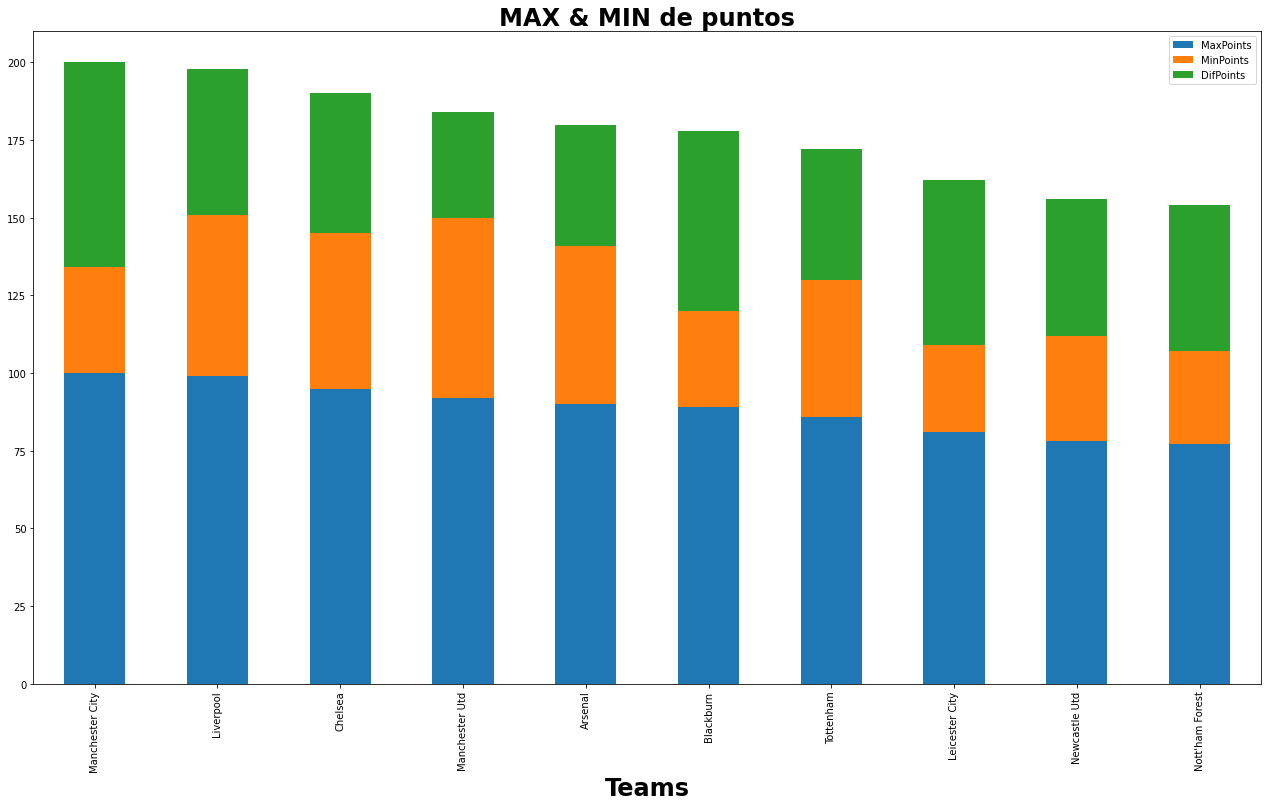

In [237]:
MaxMinPoints.sort_values(by = 'MaxPoints', ascending = False).head(10).plot(x='Team', kind='bar', stacked=True)

plt.title('MAX & MIN de puntos', fontsize = 24, fontweight = 'bold')
plt.xlabel('Teams', fontsize = 24, fontweight = 'bold')
plt.ylabel('', fontsize = 24, fontweight = 'bold')
plt.show()

In [238]:
# La cantidad de puntos con los que se ha conseguido salir campeón por temporada 

Historico.groupby(['Season'])['Points'].max()

Season
1993     84
1994     92
1995     89
1996     82
1997     75
1998     78
1999     79
2000     91
2001     80
2002     87
2003     83
2004     90
2005     95
2006     91
2007     89
2008     87
2009     90
2010     86
2011     80
2012     89
2013     89
2014     86
2015     87
2016     81
2017     93
2018    100
2019     98
2020     99
2021     86
2022     93
Name: Points, dtype: int64

In [239]:
PromMax = (Historico.groupby(['Season'])['Points'].max()).mean()

print ('El promedio de puntos para salir Campeón es de: ', round(PromMax, 2)) 

El promedio de puntos para salir Campeón es de:  87.63


In [240]:
PromMin = (Historico.groupby(['Season'])['Points'].min()).mean()

print ('El promedio más bajo de puntos para una temporada es de: ', round(PromMin, 2))

El promedio más bajo de puntos para una temporada es de:  26.53


In [241]:
# Con los métodos (- groupby() -) y la función (- agg -) podemos obtener una vista mas detallada de las tablas de
# posiciones por temporada, donde podemos ver para este caso los mínimos de puntos, el promedio, la desviación y el máximo

round(Historico.groupby(['Season']).agg({'Points' : ['min', 'mean', 'std', 'max']}),1)

Points                 
          min  mean   std  max
Season                        
1993       40  57.1  10.4   84
1994       30  56.5  15.5   92
1995       27  56.9  16.3   89
1996       29  52.1  15.2   82
1997       34  51.0  11.9   75
1998       33  52.2  12.4   78
1999       30  51.2  14.0   79
2000       24  52.4  16.1   91
2001       26  52.0  14.0   80
2002       28  52.0  16.7   87
2003       19  52.5  15.3   83
2004       33  51.6  15.2   90
2005       32  51.5  17.1   95
2006       15  53.2  18.6   91
2007       28  52.1  15.9   89
2008       11  52.0  19.7   87
2009       32  52.2  18.2   90
2010       28  52.2  18.1   86
2011       33  51.4  12.8   80
2012       25  52.4  17.4   89
2013       25  51.6  17.8   89
2014       30  53.1  19.3   86
2015       30  52.4  16.3   87
2016       17  51.6  15.4   81
2017       24  52.8  19.9   93
2018       31  52.0  19.2  100
2019       16  53.4  21.0   98
2020       21  52.4  17.8   99
2021       23  52.8  16.9   86
2022       22  52.6  19.3   93

In [242]:
# La menor cantidad de puntos alcanzados en una temporada 

Historico.loc[(Historico['Points'] == 11), :]

,Season,Team,Wins,Losses,Draws,Points
312,2008,Derby County,1,29,8,11


In [243]:
# La cantidad máxima de puntos alcanzados en una temporada

Historico.loc[(Historico['Points'] == 100), :]

,Season,Team,Wins,Losses,Draws,Points
516,2018,Manchester City,32,2,4,100


In [244]:
# Las temporadas con menos derrotas de la historia de Premier League

# Curiosamente tanto Arsenal como Chelsea salieron campeones de sus temporadas record, el Liverpool no pudo hacerlo 
# A pesar de conseguir 97 puntos (casi 10 por encima del promedio para salir campeón) y ceder solo 1 derrota en toda  
# la temporada, se topó con el Manchester City, quien ese mismo año alcanzo los 98 puntos y se coronó campeón, 
# en lo que es recordado como uno de los cierres de temporada más apasionantes de la historia, con ambos equipos con
# opciones de campeonato hasta el ultimo minuto del ultimo partido de la temporada

Historico.loc[(Historico['Losses'] <= 1), :]

,Season,Team,Wins,Losses,Draws,Points
226,2004,Arsenal,26,0,12,90
252,2005,Chelsea,29,1,8,95
537,2019,Liverpool,30,1,7,97


In [245]:
Historico.loc[Historico['Season'] == 2019, :].sort_values(by = 'Points', ascending = False)

,Season,Team,Wins,Losses,Draws,Points
538,2019,Manchester City,32,4,2,98
537,2019,Liverpool,30,1,7,97
531,2019,Chelsea,21,8,9,72
542,2019,Tottenham,23,13,2,71
526,2019,Arsenal,21,10,7,70
539,2019,Manchester Utd,19,10,9,66
545,2019,Wolves,16,13,9,57
533,2019,Everton,15,14,9,54
544,2019,West Ham,15,16,7,52
536,2019,Leicester City,15,16,7,52


In [246]:
# La equipos con la mayor cantidad de victorias en una temporada

# Podemos notar que todos los registros se concentran en las ultimas 5 temporadas ,siendo en las mismas habituales
# la presencia de Manchester City y Liverpool, dirigidos respectivamente por Pep Guardiola y Jurgen Klopp.

# El único que se cuela en este resumen es el Chelsea quien en la temporada 2016-17 de la mano del técnico italiano 
# Antonio Conte no solo establece el record de victorias para una temporada (30)
# si no que ademas se alza con el título.

Historico.loc[(Historico['Wins'] >= 30), :].sort_values(by = 'Wins', ascending = False)

,Season,Team,Wins,Losses,Draws,Points
516,2018,Manchester City,32,2,4,100
538,2019,Manchester City,32,4,2,98
555,2020,Liverpool,32,3,3,99
489,2017,Chelsea,30,5,3,93
537,2019,Liverpool,30,1,7,97


In [247]:
Historico.loc[Historico['Season'] == 2017, :].sort_values(by = 'Points', ascending = False)

,Season,Team,Wins,Losses,Draws,Points
489,2017,Chelsea,30,5,3,93
502,2017,Tottenham,26,4,8,86
495,2017,Manchester City,23,6,9,78
494,2017,Liverpool,22,6,10,76
486,2017,Arsenal,23,9,6,75
496,2017,Manchester Utd,18,5,15,69
491,2017,Everton,17,11,10,61
487,2017,Bournemouth,12,16,10,46
498,2017,Southampton,12,16,10,46
504,2017,West Brom,12,17,9,45


## 10.- Campeonatos 

In [248]:
# Con esta consulta obtenemos una agrupación que no entrega por temporada cual fue el puntaje máximo alcanzado por temporada
# Aunque no nos dice quien fue el equipo que lo obtuvo.

Historico.groupby(['Season'])['Points'].max().reset_index()

,Season,Points
0,1993,84
1,1994,92
2,1995,89
3,1996,82
4,1997,75
5,1998,78
6,1999,79
7,2000,91
8,2001,80
9,2002,87


In [249]:
Champ = Historico.groupby(['Season'])['Points'].max().reset_index()
Champ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Season  30 non-null     int64
 1   Points  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [250]:
# Convertiremos las columnas de la consulta anterior en una Lista que luego uniremos para formar un diccionario que
# facilitará las futuras consultas a realizar, en donde las temporadas representaran las llaves del diccionario y 
# los puntos serán los valores de cada llave

x = list(Champ.Season)
y = list(Champ.Points)
z = dict(zip(x,y))
print(z)

{1993: 84, 1994: 92, 1995: 89, 1996: 82, 1997: 75, 1998: 78, 1999: 79, 2000: 91, 2001: 80, 2002: 87, 2003: 83, 2004: 90, 2005: 95, 2006: 91, 2007: 89, 2008: 87, 2009: 90, 2010: 86, 2011: 80, 2012: 89, 2013: 89, 2014: 86, 2015: 87, 2016: 81, 2017: 93, 2018: 100, 2019: 98, 2020: 99, 2021: 86, 2022: 93}


In [251]:
def filter_teams(group):
    points = z[group.name]
    teams = group[group['Points'] == points]
    return teams.iloc[0]

result = Historico.groupby('Season').apply(filter_teams)

In [252]:
result

,Season,Team,Wins,Losses,Draws,Points
Season,,,,,,
1993,1993,Manchester Utd,24,6,12,84
1994,1994,Manchester Utd,27,4,11,92
1995,1995,Blackburn,27,7,8,89
1996,1996,Manchester Utd,25,6,7,82
1997,1997,Manchester Utd,21,5,12,75
1998,1998,Arsenal,23,6,9,78
1999,1999,Manchester Utd,22,3,13,79
2000,2000,Manchester Utd,28,3,7,91
2001,2001,Manchester Utd,24,6,8,80


In [253]:
result['Team'].value_counts()

Manchester Utd     13
Manchester City     6
Chelsea             5
Arsenal             3
Blackburn           1
Leicester City      1
Liverpool           1
Name: Team, dtype: int64

In [254]:
# Con 13 títulos el Manchester Utd es el equipo más laureado en la historia de la English Premier League.
# Llama poderosamente la atención de que todos esos títulos se concentran en los primeros 20 años de competición
# Donde podríamos decir que el equipo de los diablos rojos gobernó con puño de hierro la competencia siempre de la mano de
# Sir Alex Ferguson, lo que convierten al DT escoces en el mejor Director Técnico de la Competición. 

# También hay que mencionar que desde la salida de Ferguson como DT del Manchester Utd el mismo no ha podido volver 
# a conseguir un título de liga  